Resampling techniques: using SMOTE

In [15]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm #svm model = support vector machines 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

In [7]:
df = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\StatsDatasets\\pima-indians-diabetes.txt",header=None)

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data dictionary 

In [8]:
df.columns = ['Pregnant',"PlasmaGlucose","DiastolicBP","SkinThickness","Insulin","BMI",
              "DiabetesPedigreeFunction","Age","Diabetic"]
df.head()

,Pregnant,PlasmaGlucose,DiastolicBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Diabetic
0    0.651042
1    0.348958
Name: proportion, dtype: float64


<Axes: xlabel='Diabetic'>

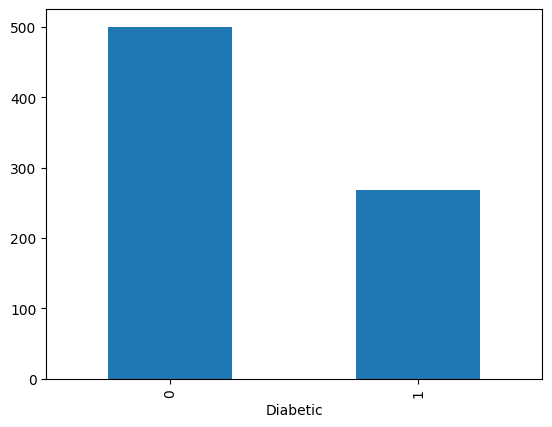

In [11]:
#Check if my target is balanced or imbalanced 
print(df["Diabetic"].value_counts(normalize=True))
df["Diabetic"].value_counts().plot(kind="bar")

#The data is imbalanced but not a big deal in real world. When it's more like 80-20 split then need to look into techniques like SMOTE. 

In [12]:
x = df.drop("Diabetic",axis=1)
y = df["Diabetic"]

In [13]:
y = df.iloc[:,-1] #This is a different style of splitting y. This works when the target is the last column
y


In [17]:
#define SMOTE instance 
sm = SMOTE()
x_resm,y_resm = sm.fit_resample(x,y)

Diabetic
1    0.5
0    0.5
Name: proportion, dtype: float64


<Axes: xlabel='Diabetic'>

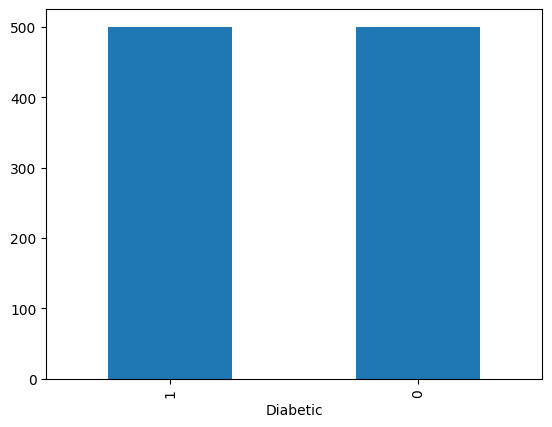

In [19]:
print(y_resm.value_counts(normalize=True))
y_resm.value_counts().plot(kind='bar')


In [21]:

#BEFORE 
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=2,random_state=12)

#AFTER
x_train_resm, x_test_resm, y_train_resm,y_test_resm = train_test_split(x_resm,y_resm,test_size=2,random_state=12)
